<a href="https://colab.research.google.com/github/Adsfk/Red-neuronal/blob/master/Perros_y_gatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diferenciador entre perros y gatos
Vamos a desarrollar una red que diferencie entre perros y gatos. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este notebook. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

In [0]:
!ls "/content/drive/My Drive/"

ls: cannot access '/content/drive/My Drive/': No such file or directory


logs  train  train_small  validation


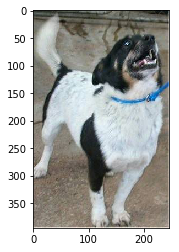

In [22]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/train/dogs/dog.982.jpg', 'r')
imshow(np.asarray(pil_im))



#Primer modelo

In [23]:
# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')


model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)

Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 120s 1s/step - loss: 0.7196 - acc: 0.5155 - val_loss: 0.6882 - val_acc: 0.5469
Epoch 2/10
100/100 [==============================] - 114s 1s/step - loss: 0.6893 - acc: 0.5400 - val_loss: 0.6798 - val_acc: 0.6557
Epoch 3/10
100/100 [==============================] - 116s 1s/step - loss: 0.6768 - acc: 0.5990 - val_loss: 0.6417 - val_acc: 0.6158
Epoch 4/10
100/100 [==============================] - 116s 1s/step - loss: 0.6459 - acc: 0.6175 - val_loss: 0.6081 - val_acc: 0.6846
Epoch 5/10
100/100 [==============================] - 115s 1s/step - loss: 0.6231 - acc: 0.6520 - val_loss: 0.5859 - val_acc: 0.6856
Epoch 6/10
100/100 [==============================] - 116s 1s/step - loss: 0.6001 - acc: 0.6805 - val_loss: 0.5821 - val_acc: 0.6816
Epoch 7/10
100/100 [==============================] - 114s 1s/step - loss: 0.5907 - acc: 0.6850 - val_loss: 0.5809 - v

# Segundo modelo

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())   ## Flatten convierte en array el tensor
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 20

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)

Epoch 1/20
100/100 [==============================] - 120s 1s/step - loss: 0.6961 - acc: 0.5280 - val_loss: 0.6709 - val_acc: 0.5969
Epoch 2/20
100/100 [==============================] - 115s 1s/step - loss: 0.6745 - acc: 0.5645 - val_loss: 0.6676 - val_acc: 0.5963
Epoch 3/20
100/100 [==============================] - 116s 1s/step - loss: 0.6480 - acc: 0.6300 - val_loss: 0.6064 - val_acc: 0.6703
Epoch 4/20
100/100 [==============================] - 118s 1s/step - loss: 0.6211 - acc: 0.6595 - val_loss: 0.5886 - val_acc: 0.6878
Epoch 5/20
100/100 [==============================] - 115s 1s/step - loss: 0.5919 - acc: 0.6900 - val_loss: 0.5901 - val_acc: 0.6929
Epoch 6/20
100/100 [==============================] - 117s 1s/step - loss: 0.5773 - acc: 0.7255 - val_loss: 0.5894 - val_acc: 0.6865
Epoch 7/20
100/100 [==============================] - 115s 1s/step - loss: 0.5606 - acc: 0.7070 - val_loss: 0.5784 - val_acc: 0.7045
Epoch 8/20
100/100 [==============================] - 116s 1s/step - 

KeyboardInterrupt: ignored